In [2]:
#라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import random

#랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

print(train.shape,test.shape, submission.shape)

(60000, 786) (10000, 785) (10000, 2)


In [5]:
#train 데이터 보기
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#train 데이터를 28*28 이미지로 변환
train_images = train.loc[:,'pixel1':].values.reshape(-1,28,28)
train_images.shape

(60000, 28, 28)

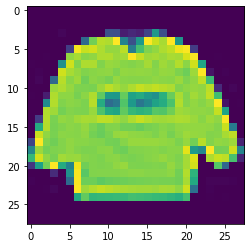

In [8]:
#첫번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [9]:
#목표 레이블
y_train = train.loc[:,'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [10]:
#숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0:'T-shirt/top',
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
                8:'Bag',
                9:'Ankle boot'}
print(y_train[0])
print(target_values[y_train[0]])

2
Pullover


In [13]:
#test 데이터를 28*28 이미지로 변환
test_images = test.loc[:,'pixel1':].values.reshape(-1,28,28)
test_images.shape

(10000, 28, 28)

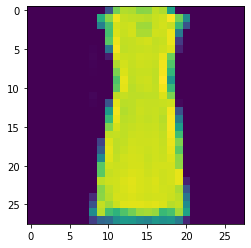

In [14]:
#500번째 test 이미지 출력
plt.imshow(test_images[499])

In [15]:
#피처 스케일 맞추기
X_train = train_images / 255
X_test = test_images / 255
print("최소값:",X_train[0].min())
print("최대값:",X_train[0].max())

최소값: 0.0
최대값: 1.0


In [16]:
#채널 차원 추가
print("변환 전:",X_train.shape, X_test.shape)
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)
print("변환 후:",X_train.shape, X_test.shape)

변환 전: (60000, 28, 28) (10000, 28, 28)
변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [17]:
#Train - Validation 데이터 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                           stratify=y_train,
                                           shuffle=True, random_state=SEED)
print("학습 데이터셋 크기:", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기:", X_val.shape, y_val.shape)

학습 데이터셋 크기: (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기: (12000, 28, 28, 1) (12000,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28,28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10,activation='softmax'))

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['acc'])

mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [20]:
mlp_history = mlp_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                           validation_data = (X_val, y_val),
                           verbose=2)

Epoch 1/20
750/750 - 3s - loss: 0.5718 - acc: 0.8039 - val_loss: 0.4434 - val_acc: 0.8478 - 3s/epoch - 4ms/step
Epoch 2/20
750/750 - 2s - loss: 0.4205 - acc: 0.8522 - val_loss: 0.4007 - val_acc: 0.8606 - 2s/epoch - 3ms/step
Epoch 3/20
750/750 - 2s - loss: 0.3852 - acc: 0.8642 - val_loss: 0.3886 - val_acc: 0.8625 - 2s/epoch - 2ms/step
Epoch 4/20
750/750 - 2s - loss: 0.3616 - acc: 0.8718 - val_loss: 0.3860 - val_acc: 0.8679 - 2s/epoch - 3ms/step
Epoch 5/20
750/750 - 2s - loss: 0.3453 - acc: 0.8751 - val_loss: 0.3741 - val_acc: 0.8688 - 2s/epoch - 3ms/step
Epoch 6/20
750/750 - 2s - loss: 0.3265 - acc: 0.8838 - val_loss: 0.3544 - val_acc: 0.8774 - 2s/epoch - 2ms/step
Epoch 7/20
750/750 - 2s - loss: 0.3155 - acc: 0.8858 - val_loss: 0.3402 - val_acc: 0.8814 - 2s/epoch - 3ms/step
Epoch 8/20
750/750 - 2s - loss: 0.3012 - acc: 0.8919 - val_loss: 0.3518 - val_acc: 0.8750 - 2s/epoch - 3ms/step
Epoch 9/20
750/750 - 2s - loss: 0.2930 - acc: 0.8924 - val_loss: 0.3362 - val_acc: 0.8822 - 2s/epoch - 3

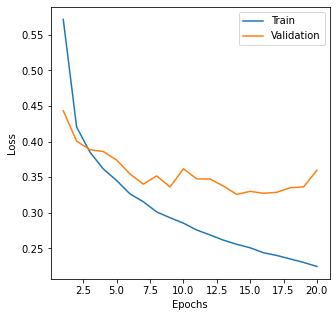

In [26]:
#손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch + 1),
            history.history['loss'][start-1:total_epoch],
            label='Train')
    plt.plot(range(start,total_epoch + 1),
            history.history['val_loss'][start-1:total_epoch],
            label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss_curve(history=mlp_history, total_epoch=20, start=1)

In [27]:
#합성곱 신경망(CNN)

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size=(3,3),
                    activation='relu',input_shape=[28,28,1]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                173120    
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [32]:
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                           validation_data=(X_val,y_val),
                           verbose=2)

Epoch 1/20
750/750 - 10s - loss: 0.5017 - acc: 0.8232 - val_loss: 0.3717 - val_acc: 0.8732 - 10s/epoch - 14ms/step
Epoch 2/20
750/750 - 10s - loss: 0.3483 - acc: 0.8767 - val_loss: 0.3293 - val_acc: 0.8849 - 10s/epoch - 13ms/step
Epoch 3/20
750/750 - 10s - loss: 0.3049 - acc: 0.8918 - val_loss: 0.3203 - val_acc: 0.8872 - 10s/epoch - 14ms/step
Epoch 4/20
750/750 - 11s - loss: 0.2762 - acc: 0.9009 - val_loss: 0.3042 - val_acc: 0.8891 - 11s/epoch - 14ms/step
Epoch 5/20
750/750 - 10s - loss: 0.2545 - acc: 0.9080 - val_loss: 0.2983 - val_acc: 0.8958 - 10s/epoch - 14ms/step
Epoch 6/20
750/750 - 12s - loss: 0.2353 - acc: 0.9160 - val_loss: 0.2781 - val_acc: 0.9014 - 12s/epoch - 17ms/step
Epoch 7/20
750/750 - 12s - loss: 0.2148 - acc: 0.9229 - val_loss: 0.2739 - val_acc: 0.9041 - 12s/epoch - 16ms/step
Epoch 8/20
750/750 - 10s - loss: 0.1998 - acc: 0.9285 - val_loss: 0.2720 - val_acc: 0.9062 - 10s/epoch - 14ms/step
Epoch 9/20
750/750 - 12s - loss: 0.1864 - acc: 0.9335 - val_loss: 0.2756 - val_a

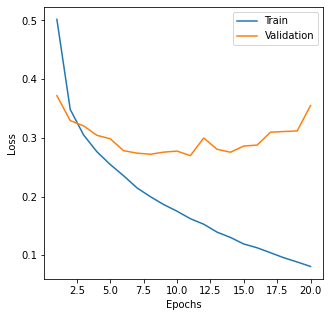

In [33]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)

In [34]:
#과대적합 방지
from tensorflow.keras.layers import Dropout
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3),
                    activation='relu', input_shape=[28,28,1]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])
    
    return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                173120    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                           validation_data = (X_val, y_val),
                           callbacks=[early_stopping],
                           verbose=0)

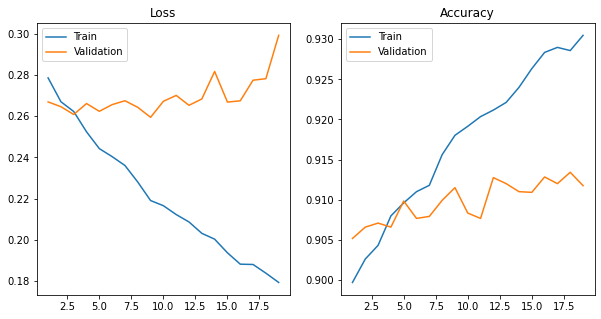

In [42]:
# 20 epoch까지 손실 함수와 정확도를 그래프로 나타내기
start = 1
end = 20

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(range(start, end), cnn_history.history['loss'][start-1:end], label='Train')
axes[0].plot(range(start, end), cnn_history.history['val_loss'][start-1:end], label='Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start, end), cnn_history.history['acc'][start-1:end], label='Train')
axes[1].plot(range(start, end), cnn_history.history['val_acc'][start-1:end], label='Validation')
axes[1].set_title('Accuracy')
axes[1].legend()
plt.show()

In [43]:
cnn_model.evaluate(X_val, y_val)

375/375 [==============================] - 2s 5ms/step - loss: 0.2993 - acc: 0.9118


[0.2992626428604126, 0.9117500185966492]

In [44]:
y_pred_proba = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
y_pred_classes[:10]

313/313 [==============================] - 1s 4ms/step


array([0, 1, 2, 2, 3, 6, 8, 6, 5, 0], dtype=int64)

In [45]:
#사용자 정의 콜백 함수
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc') > 0.91):
            self.model.stop_training = True
            print('\n')
            print("목표 정확도 달성: 검증 정확도 %.4f"%logs.get('val_acc'))

my_callback = my_callback()

#Best Model 저장
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = "best_cnn_model.h5"
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss',
                                 save_best_only=True, save_weights_only = False)

#CNN 모델 학습
cnn_model = build_cnn()
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                           validation_data=(X_val,y_val),
                           callbacks=[my_callback, save_best_model],
                           verbose=2)

Epoch 1/100
750/750 - 10s - loss: 0.6509 - acc: 0.7716 - val_loss: 0.3862 - val_acc: 0.8658 - 10s/epoch - 14ms/step
Epoch 2/100
750/750 - 12s - loss: 0.4480 - acc: 0.8440 - val_loss: 0.3335 - val_acc: 0.8812 - 12s/epoch - 17ms/step
Epoch 3/100
750/750 - 11s - loss: 0.3946 - acc: 0.8614 - val_loss: 0.3163 - val_acc: 0.8873 - 11s/epoch - 14ms/step
Epoch 4/100
750/750 - 10s - loss: 0.3629 - acc: 0.8725 - val_loss: 0.2989 - val_acc: 0.8901 - 10s/epoch - 14ms/step
Epoch 5/100
750/750 - 11s - loss: 0.3425 - acc: 0.8781 - val_loss: 0.2875 - val_acc: 0.8953 - 11s/epoch - 14ms/step
Epoch 6/100
750/750 - 11s - loss: 0.3262 - acc: 0.8833 - val_loss: 0.2858 - val_acc: 0.8950 - 11s/epoch - 14ms/step
Epoch 7/100
750/750 - 10s - loss: 0.3091 - acc: 0.8903 - val_loss: 0.2760 - val_acc: 0.9013 - 10s/epoch - 13ms/step
Epoch 8/100
750/750 - 10s - loss: 0.2955 - acc: 0.8938 - val_loss: 0.2680 - val_acc: 0.9036 - 10s/epoch - 13ms/step
Epoch 9/100
750/750 - 10s - loss: 0.2880 - acc: 0.8972 - val_loss: 0.260

In [47]:
from tensorflow.keras.models import load_model
#ModelCheckPoint에 저장해둔 모델 로딩
best_model = load_model("best_cnn_model.h5")
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      